In [2]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use("bmh")
%matplotlib inline

# System value analysis

The total system cost includes the optimisation relevant costs, which consist of newly installed generation, storage and network components, including any operational costs.

**Definition:** the "system value" of a technology as the reduction in total electricity system cost that results from adding the new technology as an additional resource option in the capacity expansion framework.

In [3]:
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from scipy.interpolate import griddata
from matplotlib.lines import Line2D

In [4]:
cost = pd.read_csv("system cost.csv", index_col=0)

In [5]:
cost.set_index('opt', inplace=True)

the network called `off` is the network without MDES

In [6]:
off = pypsa.Network("elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-off.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-off.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [7]:
off.objective/1e9

94.91518573119832

In [8]:
cost['System Cost Reduction [%]'] = (off.objective/1e9-cost.iloc[:,3])/(off.objective/1e9)*100 # cost reduction [%]

In [9]:
cost1 = cost.loc[cost["Energy Capacity Cost [Euro/kWh]"] == 1]
cost5 = cost.loc[cost["Energy Capacity Cost [Euro/kWh]"] == 5]
cost25 = cost.loc[cost["Energy Capacity Cost [Euro/kWh]"] == 25]
cost50 = cost.loc[cost["Energy Capacity Cost [Euro/kWh]"] == 50]
cost75 = cost.loc[cost["Energy Capacity Cost [Euro/kWh]"] == 75]
cost100 = cost.loc[cost["Energy Capacity Cost [Euro/kWh]"] == 100]

In [11]:
#CAES - energy capacity cost[1,10]
x_caes = 300
y_caes = 64
width_caes = 900
height_caes = 9
#PTES - energy capacity cost[4.4,50]
x_ptes = 1100
y_ptes = 37
width_ptes = 1800
height_ptes = 33
#LAES - energy capacity cost[130,580]
x_laes = 600
y_laes = 52
width_laes = 2200
height_laes = 18
#VRB - energy capacity cost[40,260]
x_vrb = 110
y_vrb = 65
width_vrb = 280
height_vrb = 13

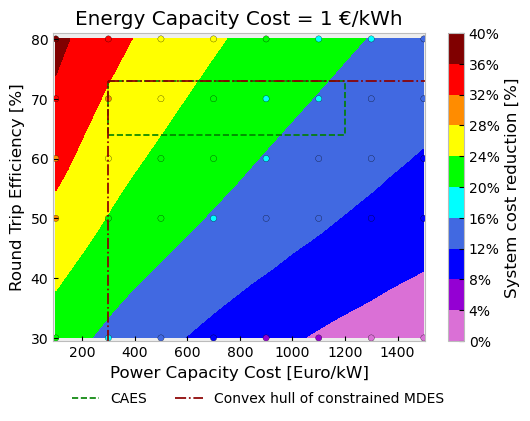

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
# cost reduction
x = cost1.iloc[:,2].values
y = cost1.iloc[:,1].values
z = cost1.iloc[:,4].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='cubic')
bins = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0%', '4%', '8%', '12%', '16%', '20%', '24%', '28%', '32%', '36%', '40%'])
cbar.set_label('System cost reduction [%]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
#rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
#ax.add_patch(rect_ptes)

ax.set_xlabel('Power Capacity Cost [Euro/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 1 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES')]
# Create the legend
ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.25), frameon=False)
plt.grid(False)
#plt.savefig('System value for 1 Euro per KWh.png',dpi=750)# , bbox_inches='tight'
plt.show()

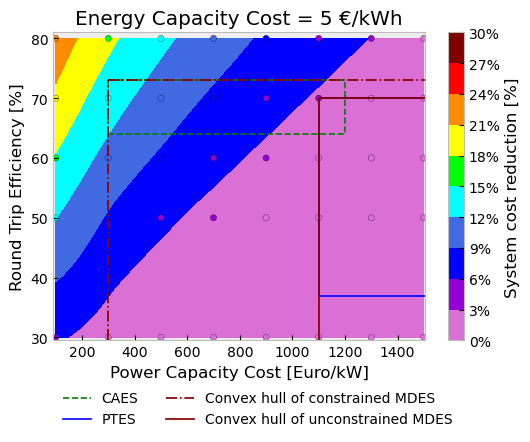

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
# cost reduction
x = cost5.iloc[:,2].values
y = cost5.iloc[:,1].values
z = cost5.iloc[:,4].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='cubic')
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0%', '3%', '6%', '9%', '12%', '15%', '18%', '21%', '24%', '27%', '30%'])
cbar.set_label('System cost reduction [%]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)

ax.set_xlabel('Power Capacity Cost [Euro/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 5 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
plt.axvline(x=x_ptes, ymin=0, ymax=1/(y_max-y_min)*(y_ptes+height_ptes-y_min), ls="-", c="darkred", linewidth=1.25)
plt.axhline(y=y_ptes+height_ptes, xmin=1/(x_max-x_min)*(x_ptes-x_min), ls="-", c="darkred", linewidth=1.25)

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.32), frameon=False)
plt.grid(False)
#plt.savefig('System value for 5 Euro per KWh.png', dpi=750)
plt.show()

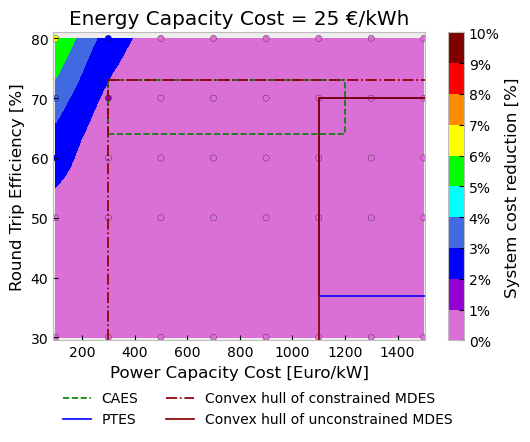

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
# cost reduction
x = cost25.iloc[:,2].values
y = cost25.iloc[:,1].values
z = cost25.iloc[:,4].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='cubic')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,marker='o',s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0%', '1%', '2%', '3%', '4%', '5%', '6%', '7%', '8%', '9%', '10%'])
cbar.set_label('System cost reduction [%]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)

ax.set_xlabel('Power Capacity Cost [Euro/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 25 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
plt.axvline(x=x_ptes, ymin=0, ymax=1/(y_max-y_min)*(y_ptes+height_ptes-y_min), ls="-", c="darkred", linewidth=1.25)
plt.axhline(y=y_ptes+height_ptes, xmin=1/1/(x_max-x_min)*(x_ptes-x_min), ls="-", c="darkred", linewidth=1.25)

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.32), frameon=False)
plt.grid(False)
#plt.savefig('System value for 25 Euro per KWh.png', dpi=750)
plt.show()

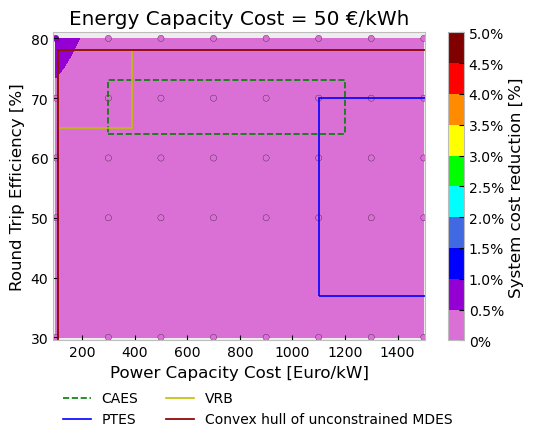

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
# cost reduction
x = cost50.iloc[:,2].values
y = cost50.iloc[:,1].values
z = cost50.iloc[:,4].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='cubic')
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0%', '0.5%', '1.0%', '1.5%', '2.0%', '2.5%', '3.0%', '3.5%', '4.0%', '4.5%', '5.0%'])
cbar.set_label('System cost reduction [%]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='y')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.add_patch(rect_vrb)

ax.set_xlabel('Power Capacity Cost [Euro/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 50 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_vrb, ymin=0, ymax=1/(y_max-y_min)*(y_vrb+height_vrb-y_min), ls="-", c="darkred", linewidth=1.25)
plt.axhline(y=y_vrb+height_vrb, xmin=1/(x_max-x_min)*(x_vrb-x_min), ls="-", c="darkred", linewidth=1.25)

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='y', linewidth=1.2, linestyle='-', label='VRB'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.32), frameon=False)

plt.grid(False)
#plt.savefig('System value for 50 Euro per KWh.png', dpi=750)
plt.show()

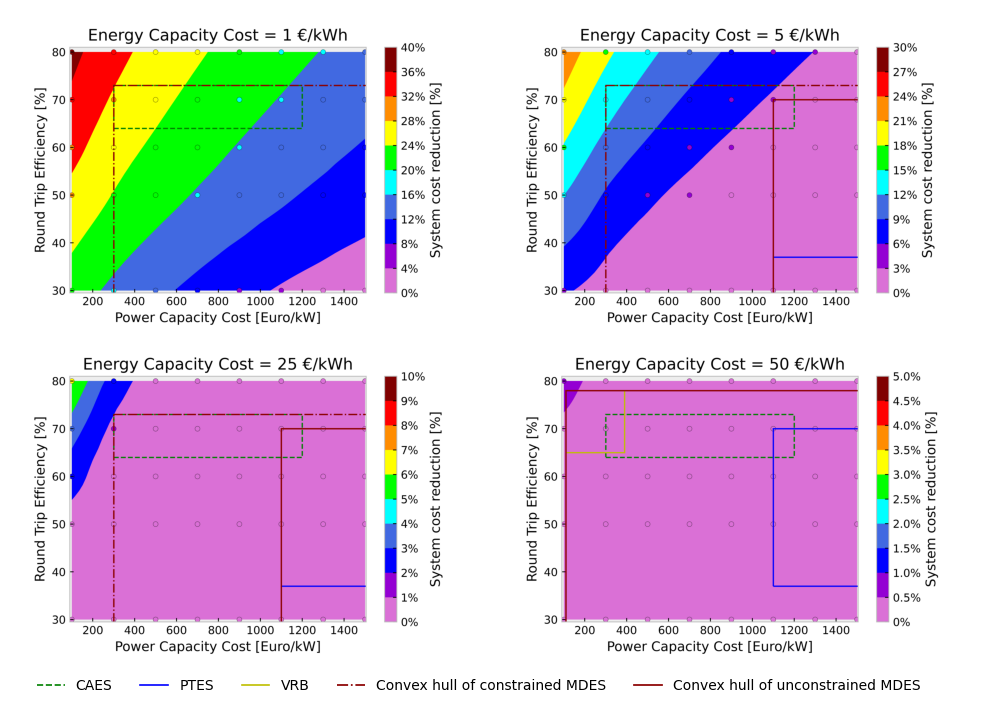

In [16]:
import matplotlib.image as mpimg

image_paths = ['System value for 1 Euro per KWh.png', 'System value for 5 Euro per KWh.png', 
               'System value for 25 Euro per KWh.png', 'System value for 50 Euro per KWh.png']

fig, axs = plt.subplots(2, 2, figsize=(10,10))

for ax, img_path in zip(axs.ravel(), image_paths):
    img = mpimg.imread(img_path) 
    ax.imshow(img) 
    ax.axis('off') 

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='y', linewidth=1.2, linestyle='-', label='VRB'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
    
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
# Create the legend
ax.legend(handles=legend_elements,ncol=5,loc='lower center', bbox_to_anchor=(-0.05, -0.15), frameon=False)
#plt.savefig('System value analysis.pdf', dpi=750, bbox_inches="tight")
plt.show()


The analysis in this part explores the influence of alterations in the design performance of Medium-duration Energy Storage (MDES) systems on the whole system cost of the European electricity system.

Because the design costs and efficiency of MDES technology are sized independently and the relationship between three parameters and the system value of MDES deployment is measured with the `Pearson correlation coefficient`

In [18]:
x = cost.corr(method='pearson')

In [19]:
coefficients = np.around(x, decimals=2)
coefficients

,Energy Capacity Cost [Euro/kWh],Round Trip Efficiency [%],Power Capacity Cost [Euro/kW],Total System Cost [billion Euro],System Cost Reduction [%]
Energy Capacity Cost [Euro/kWh],1.00,-0.00,0.00,0.52,-0.52
Round Trip Efficiency [%],-0.00,1.00,0.00,-0.16,0.16
Power Capacity Cost [Euro/kW],0.00,0.00,1.00,0.21,-0.21
Total System Cost [billion Euro],0.52,-0.16,0.21,1.00,-1.00
System Cost Reduction [%],-0.52,0.16,-0.21,-1.00,1.00


In [20]:
coefficients.to_csv("Pearson correlation coefficients.csv")